**in this implementation we will calculate systematic risk measure paramenter beta with from both theoratical formula and lineaar regression.and we will calculate expected return of stock.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
class CAPM:
  def __init__(self,stocks,start_date,end_date):
    self.data=None
    self.stocks=stocks
    self.start_date=start_date
    self.end_date=end_date

  def download_data(self):
    df={}

    for stock in self.stocks:
      ticker=yf.download(stock,self.start_date,self.end_date)
      df[stock]=ticker['Adj Close']

    return pd.DataFrame(df)

  def initialize(self):
    stock_data=self.download_data()
    #using monthly return
    stock_data=stock_data.resample('M').last()
    self.df = pd.DataFrame({'s_adjclose': stock_data[self.stocks[0]],'m_adjclose': stock_data[self.stocks[1]]})
    #print(self.df)
    # logarithmic monthly returns
    self.df[['s_returns', 'm_returns']] = np.log(self.df[['s_adjclose', 'm_adjclose']] /self.df[['s_adjclose', 'm_adjclose']].shift(1))

    self.df = self.df[1:]
    #print(self.df)

  def calculate_beta(self):
    covariance_matrix = np.cov(self.df["s_returns"], self.df["m_returns"])
    # covariance matrix: the diagonal items are the variances
    # off diagonals are the covariances
    beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
    print("Beta from formula: ", beta)

  def regression(self):
    # using linear regression to fit a line to the data
    # [stock_returns, market_returns] - slope is the beta
    beta, alpha = np.polyfit(self.df['m_returns'], self.df['s_returns'], deg=1)
    print("Beta from regression: ", beta)
    # calculate the expected return according to the CAPM formula
    # we are after annual return (this is why multiply by 12)
    expected_return = 0.05 + beta * (self.df['m_returns'].mean()*12- 0.05)
    print("Expected return: ", expected_return)
    self.plot_regression(alpha, beta)

  def plot_regression(self, alpha, beta):
    fig, axis = plt.subplots(1, figsize=(20, 10))
    axis.scatter(self.df["m_returns"], self.df['s_returns'], label="Data Points")
    axis.plot(self.df["m_returns"], beta * self.df["m_returns"] + alpha, color='red', label="CAPM Line")
    plt.title('Capital Asset Pricing Model, finding alpha and beta')
    plt.xlabel('Market return $R_m$', fontsize=18)
    plt.ylabel('Stock return $R_a$')
    plt.text(0.08, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize=18)
    plt.legend()
    plt.grid(True)
    plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Beta from formula:  0.8611155613912832
Beta from regression:  0.8611155613912828
Expected return:  0.0924111719245562


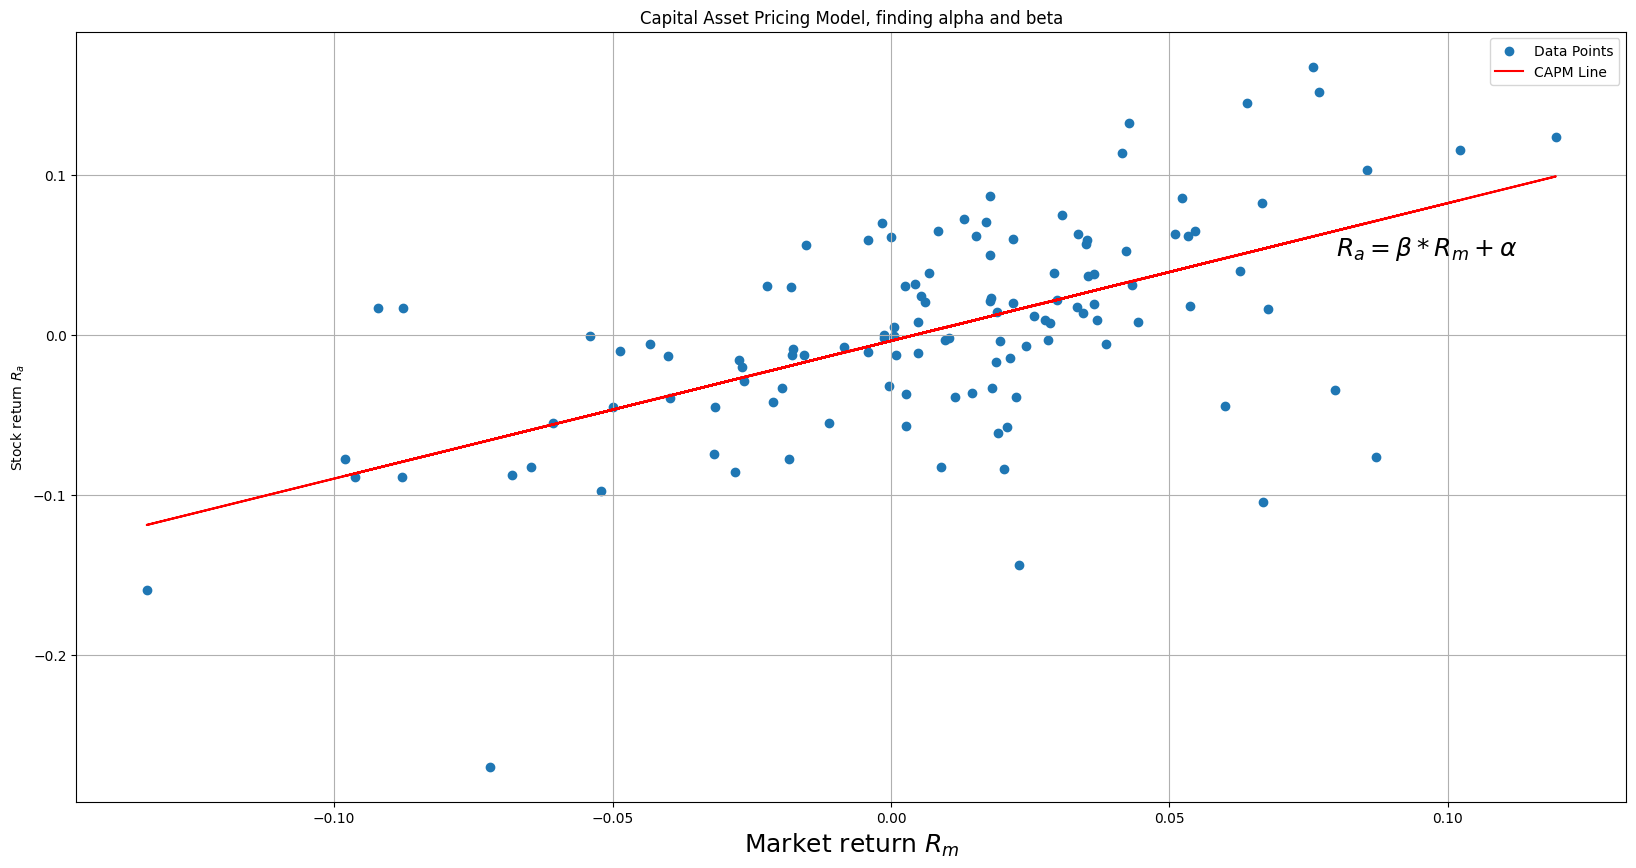

In [3]:
if __name__=='__main__':
  capm=CAPM(['IBM','^GSPC'],'2014-01-01','2024-01-01')
  capm.initialize()
  capm.calculate_beta()
  capm.regression()

